# Pronóstico de precios de viviendas


**Introducción**: Es importante pronosticar el precios de las viviendas a partir de datos y no a partir de suposiciones o juicios de las personas.

**Contexto**: Se toman las viviendas de Bogotá (apartamentos y casas), sus características y precios de la página metrocuadrado.com

**Objetivo**: Estimar el precio de las casas y apartamentos de Bogotá y clasificarlos.

**Metodología**: 

1. Se toman las viviendas, se realiza un análisis descriptivo-exploratorio con el cual se observan oportunidades de transformación de los datos y entendimiento de los mismos.
2. Se realiza un modelo de regresión de los precios y un modelo de clasificación del tipo de vivienda y se evalúa su desempeño.
3. Se anotan las lecciones aprendidas.

![](https://d31dn7nfpuwjnm.cloudfront.net/images/valoraciones/0034/8136/casa-hipotecada-se-puede-vender.png?1565825047)

## 1. Importar e instalar librerías y cargar datos

In [57]:
! pip install sweetviz

"pip" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sweetviz as sv
import seaborn as sns

En seguida se cargan los datos. Estos fueron obtenidos directamente de la página metrocuadrado.com por medio de webscraping (raspado web)

In [59]:
datos = pd.read_csv('https://raw.githubusercontent.com/Wilsonsr/Metodos-Estadisticos/main/BASES/inmuebles_bogota_res.csv')
datos

,Unnamed: 0,mtipoinmueble,mvalorventa,marea,mnrocuartos,mnrobanos,mnrogarajes,mzona,mbarrio,mnombrecomunbarrio
0,0,Apartamento,385000000,100.0,3,2,1.0,Chapinero,ALFONSO LOPEZ,GALERIAS
1,1,Apartamento,190810000,34.0,1,2,1.0,Norte,EL CODITO,EL REDIL
2,2,Apartamento,720000000,157.0,3,4,2.0,Noroccidente,NIZA SUBA,Cerros De Niza
3,3,Casa,1018660600,173.0,3,4,1.0,Otros,NaN,NaN
4,4,Apartamento,1850000000,190.0,3,4,2.0,Norte,CERROS DE LOS ALPES,CERROS DE LOS ALPES
...,...,...,...,...,...,...,...,...,...,...
9995,245,Apartamento,580000000,0.0,2,3,2.0,Norte,SANTA BARBARA OCCIDENTAL,Santa Barbara Occidental-Usaquén
9996,246,Casa,330000000,72.0,3,2,1.0,Norte,LA LIBERIA,LAS MARGARITAS
9997,247,Casa,1200000000,400.0,3,4,3.0,Norte,EL CONTADOR,El Contador
9998,248,Casa,642000000,191.0,4,4,2.0,Noroccidente,CIUDAD JARDIN NORTE,Gratamira


## 2. Análisis descriptivo básico

In [60]:
datos.describe()

,Unnamed: 0,mvalorventa,marea,mnrogarajes
count,10000.000000,1.000000e+04,10000.000000,9945.000000
mean,124.500000,2.666785e+09,170.825361,1.818602
std,72.171815,3.509427e+10,284.303566,1.113742
min,0.000000,1.100000e+06,0.000000,0.000000
25%,62.000000,4.090000e+08,68.000000,1.000000
50%,124.500000,6.900000e+08,117.000000,2.000000
75%,187.000000,1.250000e+09,200.000000,2.000000
max,249.000000,8.700000e+11,5808.000000,4.000000


In [61]:
datos.describe(include=object)

,mtipoinmueble,mnrocuartos,mnrobanos,mzona,mbarrio,mnombrecomunbarrio
count,10000,9993,10000,9812,9945,9866
unique,2,6,7,8,363,790
top,Apartamento,3,2,Norte,SAN JOSE DE BAVARIA,SAN JOSE DE BAVARIA
freq,7736,5043,3276,5105,419,221


Se observa que `mnrocuartos` y `mnrobanos` se capturan como tipo textual, cuando deberían ser numéricas. Vamos a revisar de manera detallada lo que está sucediendo con estas variables


In [62]:
datos.mnrocuartos.unique()

array(['3', '1', '2', '4', '5', '5+', nan], dtype=object)

In [63]:
datos.mnrobanos.unique()

array(['2', '4', '1', '3', '5', '0', '5+'], dtype=object)

Hemos identificado el problema!
Vamos a corregirlo, más adelante

## 3. Preprocesamiento de datos

Con la función `apply`, cada vez que una fila contenga `5+` lo convierte en `6`.

In [64]:
# Las siguientes variables contienen valores 5+ indicando que hay mas de 5.
# En tal caso se pasan a 6 y se convierte a tipo float
datos2 = datos.copy()
datos2['mnrocuartos'] = datos.mnrocuartos.apply(lambda x: 6 if x=='5+' else x).astype(float)
datos2['mnrobanos'] = datos.mnrobanos.apply(lambda x: 6 if x=='5+' else x).astype(float)

Revisamos y efectivamente el problema fue corregido:

In [65]:
datos2.mnrocuartos.unique()

array([ 3.,  1.,  2.,  4.,  5.,  6., nan])

Ahora eliminemos la columna `Unnamed: 0`

In [66]:
datos2.drop(columns='Unnamed: 0', inplace=True)

## 4. Análisis descriptivo exploratorio (EDA)

Utilizando la librería `sweetviz` podemos realizar un EDA de manera eficiente.

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



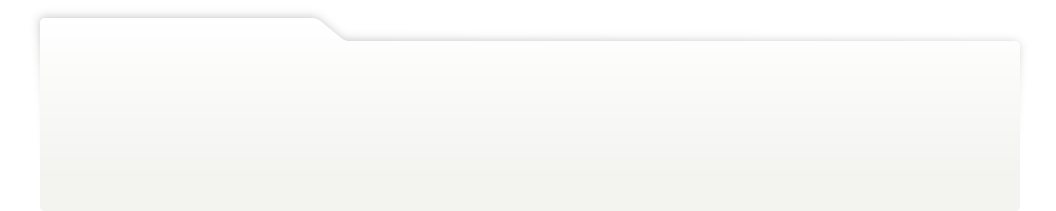
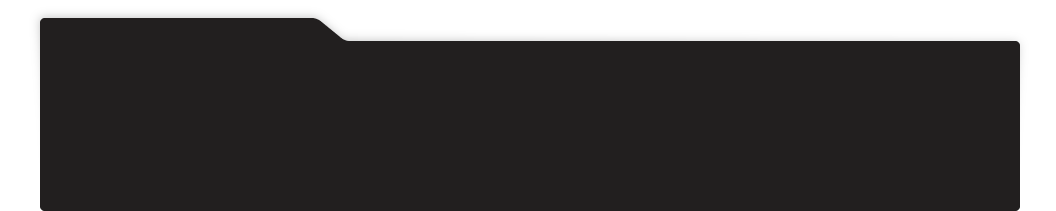
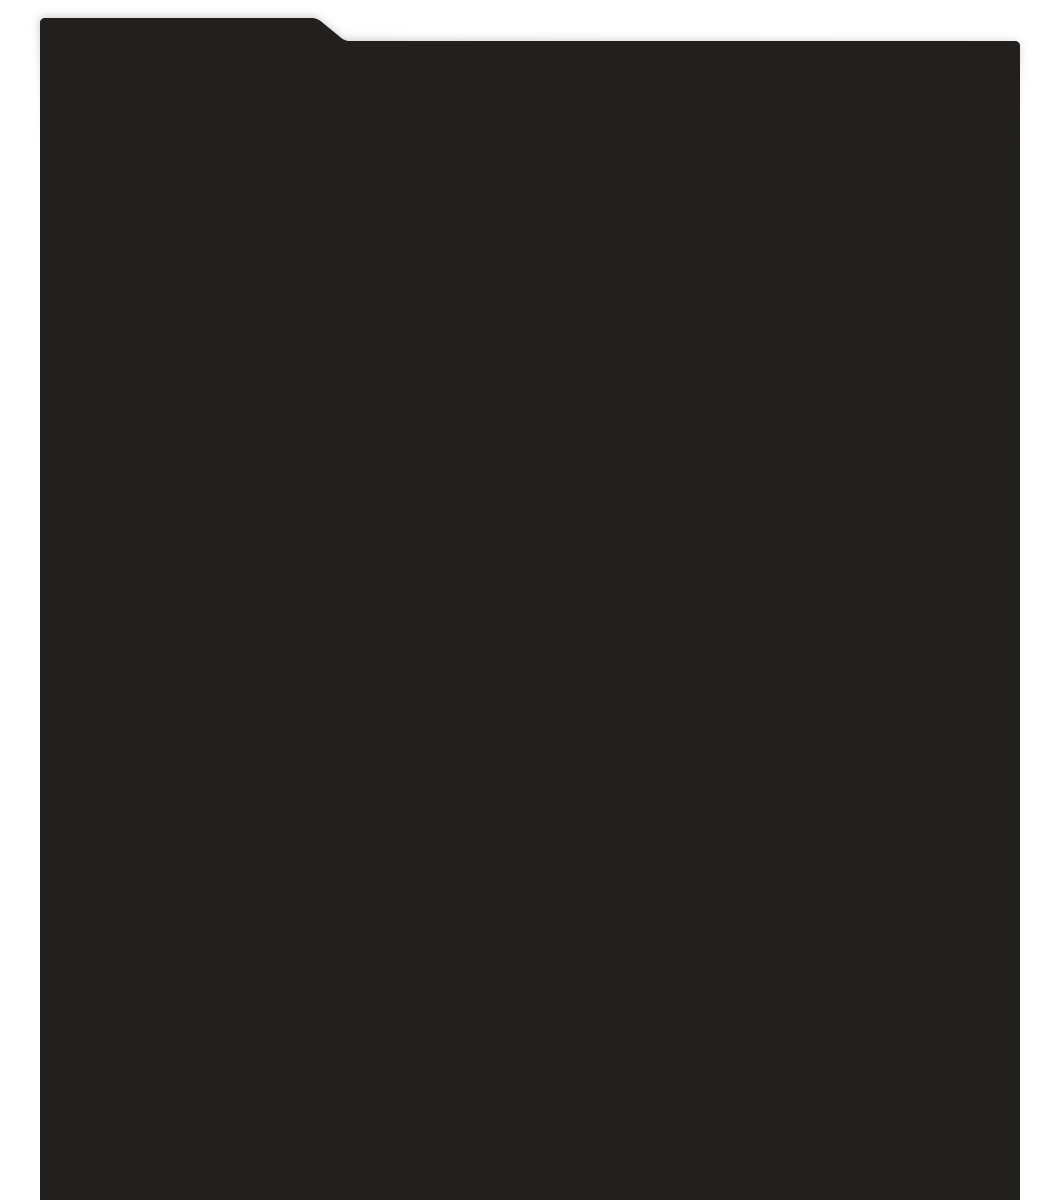
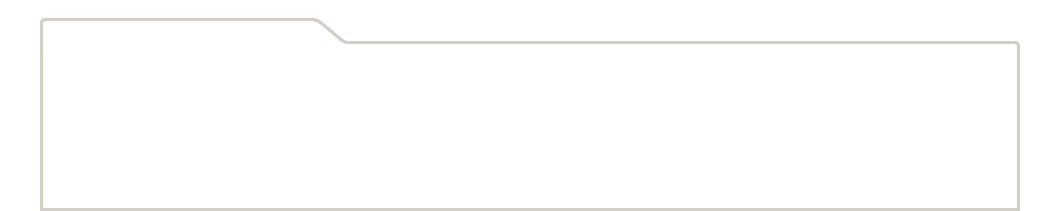
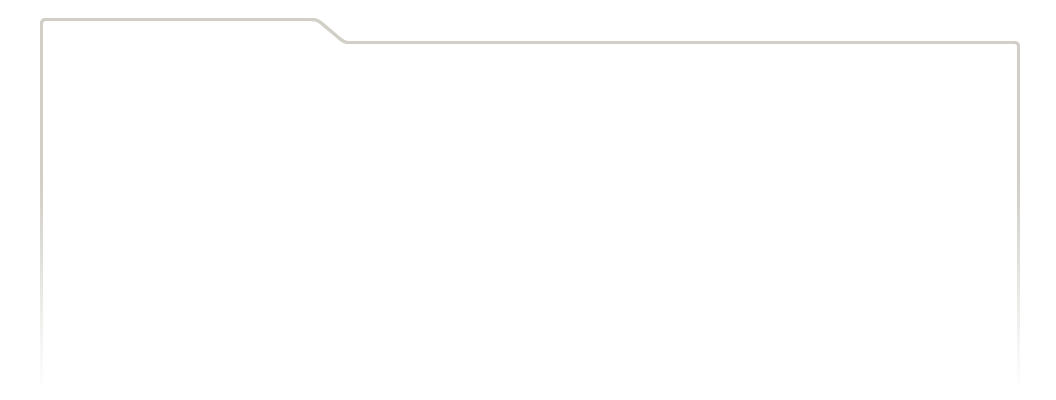
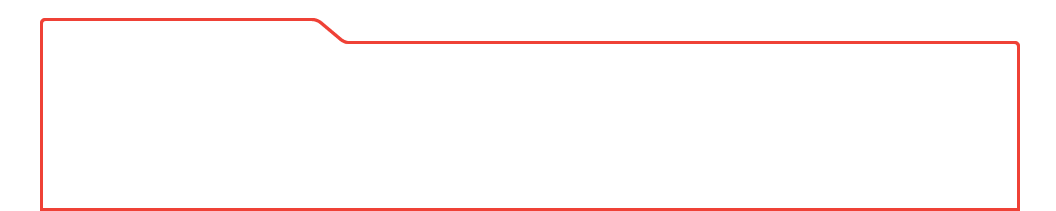
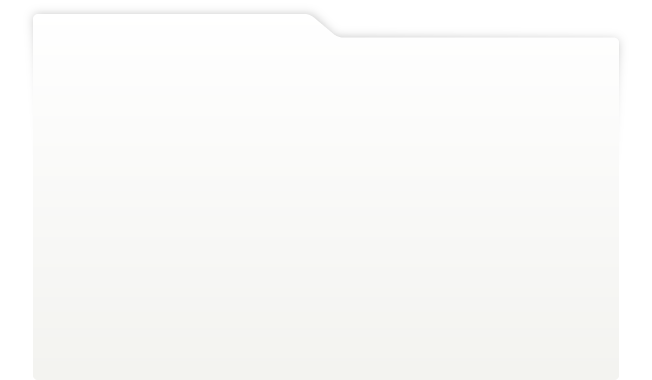
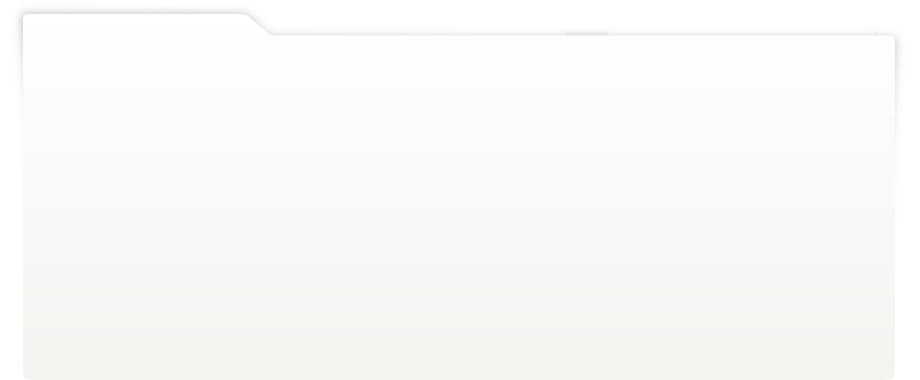
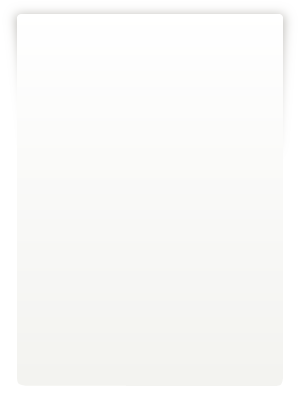
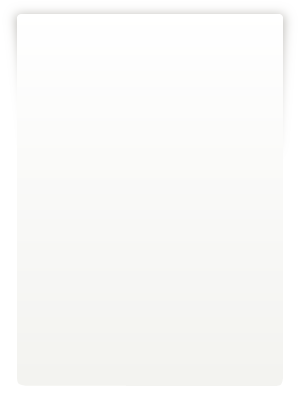
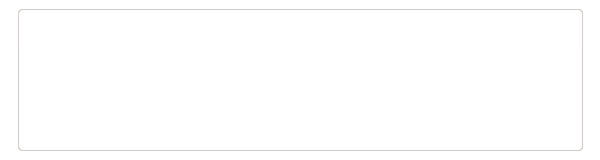
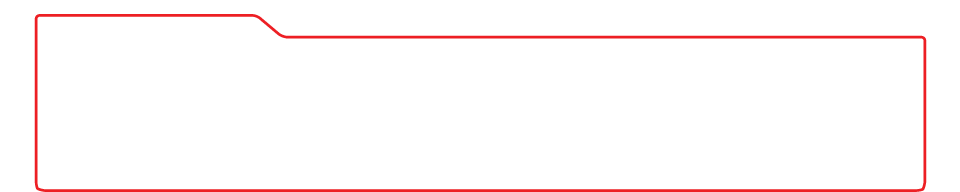
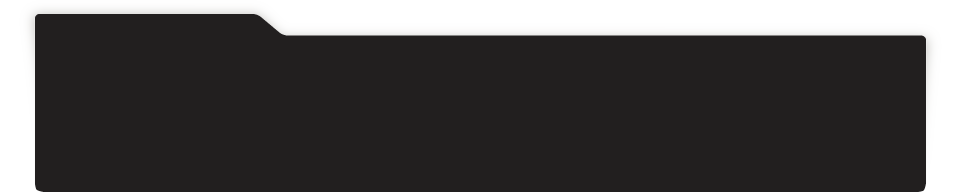
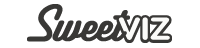
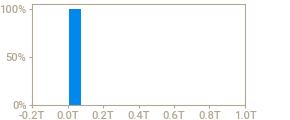
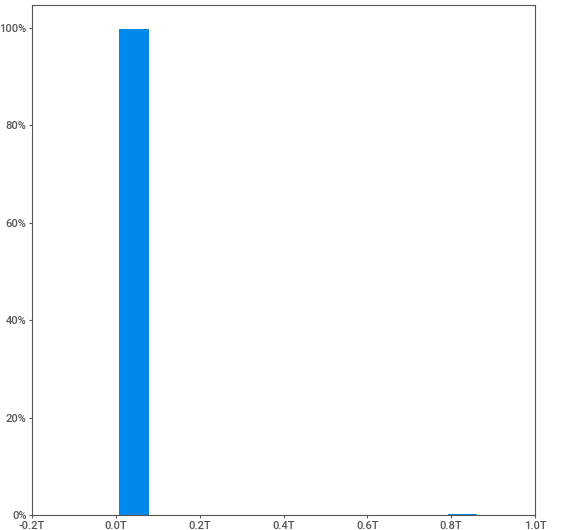
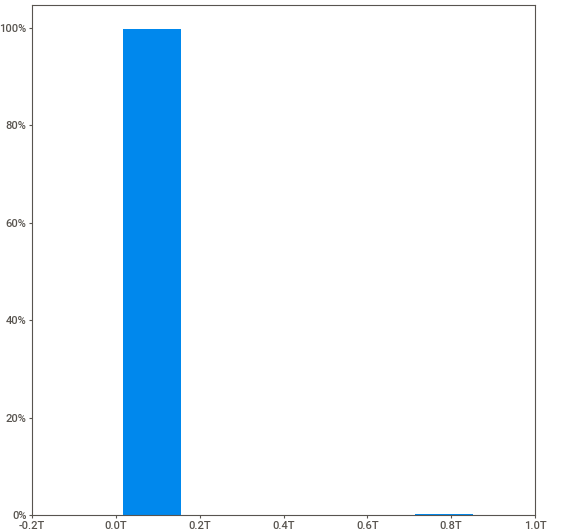
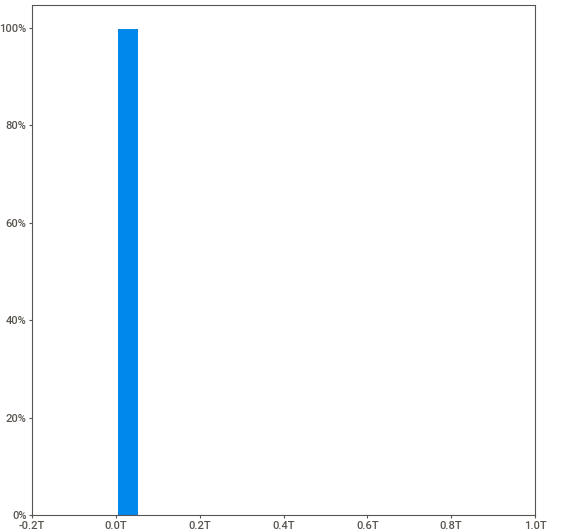
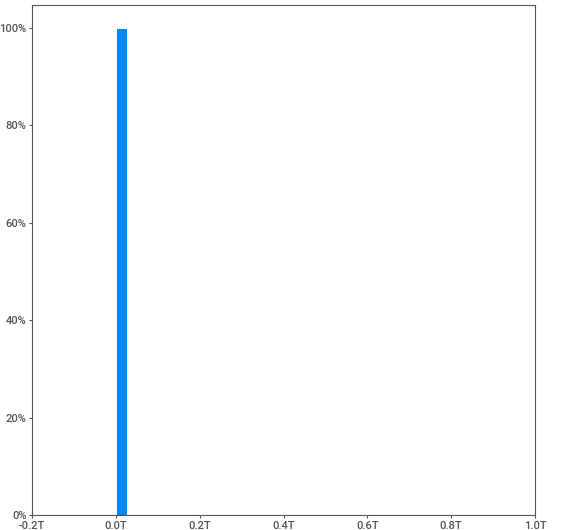
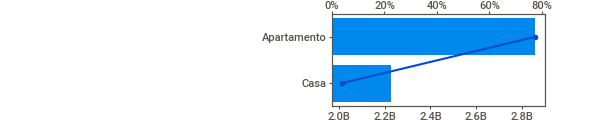
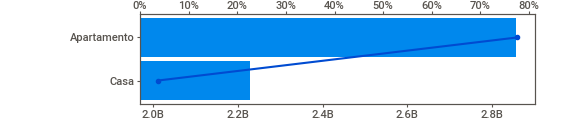
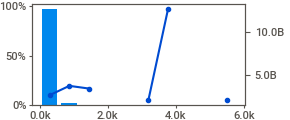
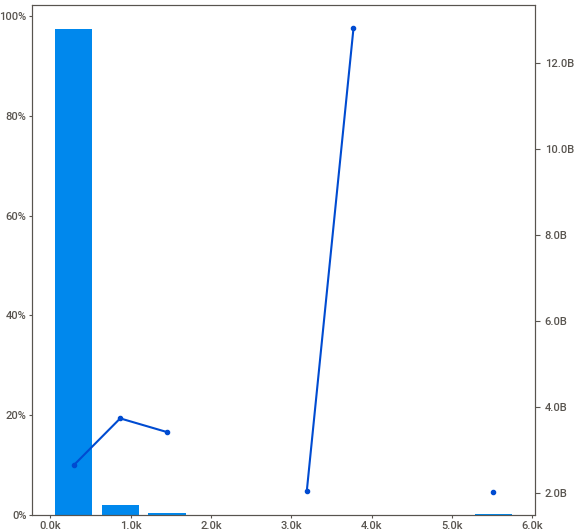
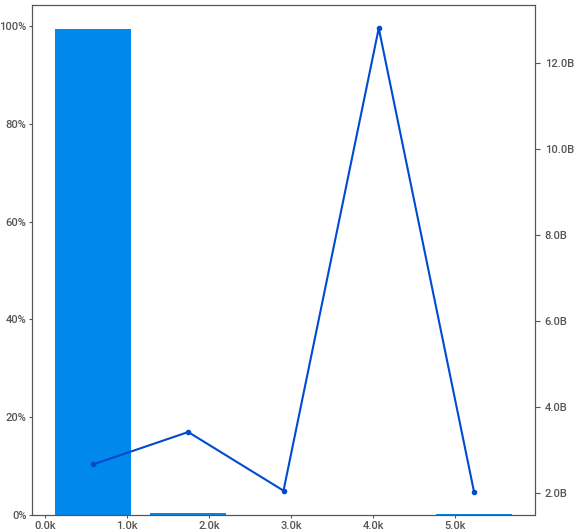
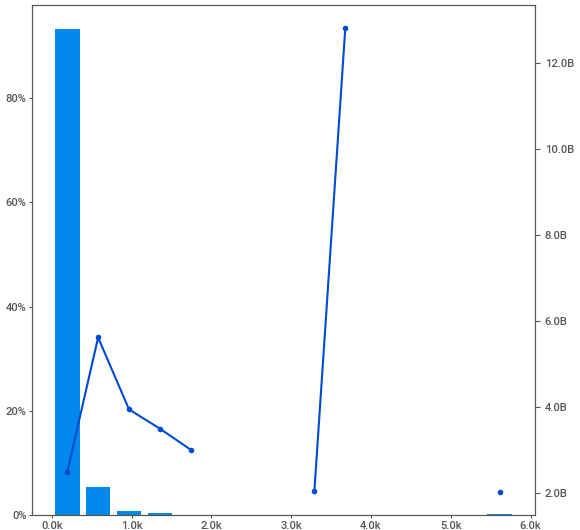
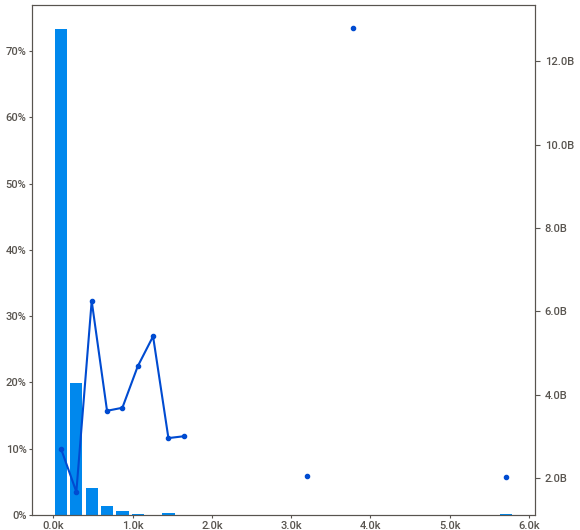
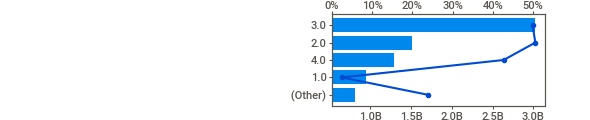
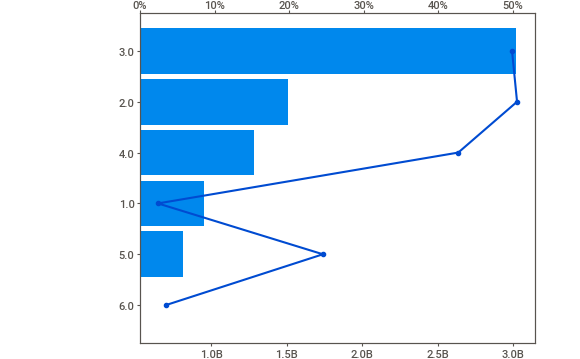
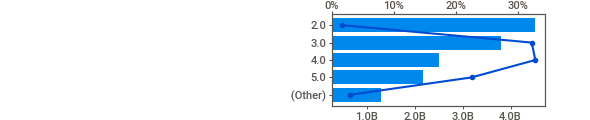
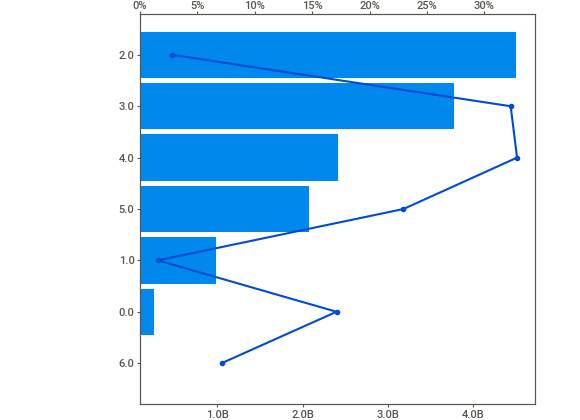
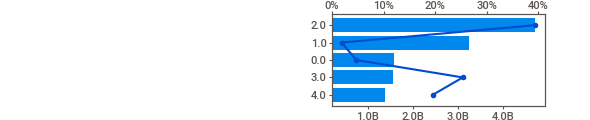
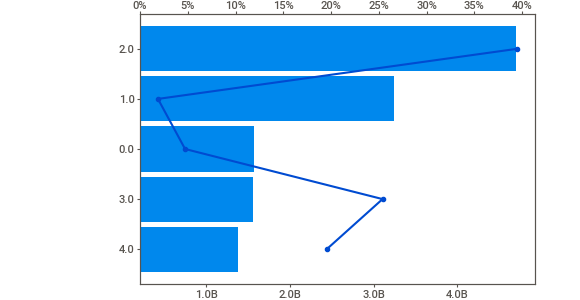
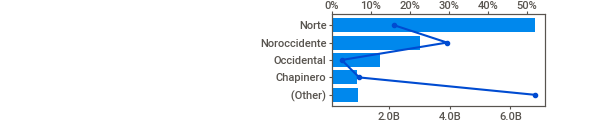
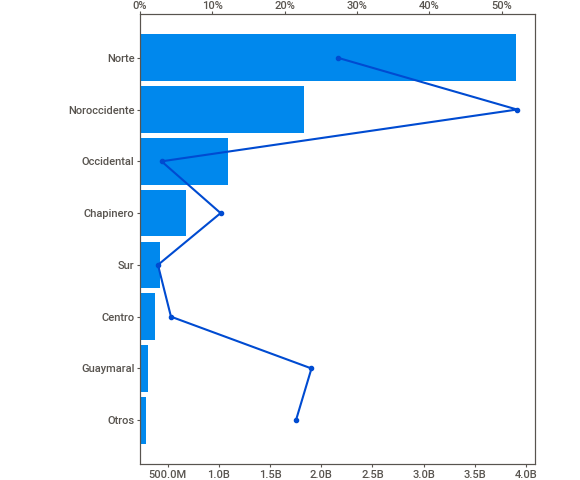
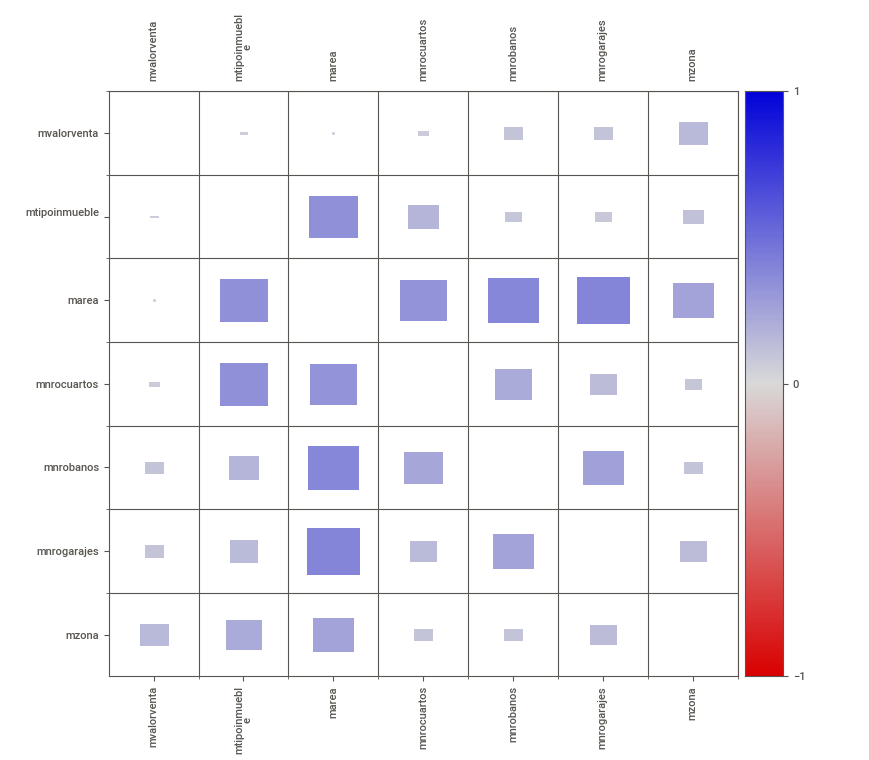
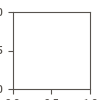

In [67]:
from IPython.display import HTML
reporte = sv.analyze(datos2, target_feat='mvalorventa')
reporte.show_html()
HTML('SWEETVIZ_REPORT.html')

**Análisis**

* Se identifican varias variables con fuerte sesgo a la derecha. Incluída la variable objetivo. En seguida se realiza un ajuste utilizando `log10`.

In [68]:
datos3 = datos2.copy()
datos3['mvalorventa_log10'] = datos2.mvalorventa.apply(np.log10)
datos3['marea_log10'] = datos2.marea.apply(lambda x: np.log10(x+1))

Revisemos si el valor de venta tiene valores `-inf`. Se ordenan de menor a mayor y se observa que están entre 1M y 1B.

In [69]:
datos3.mvalorventa_log10.sort_values()

974      6.041393
1814     6.041393
1394     6.041393
1604     6.041393
2024     6.041393
          ...    
4399    11.939519
3979    11.939519
4609    11.939519
4819    11.939519
4189    11.939519
Name: mvalorventa_log10, Length: 10000, dtype: float64

Ahora vamos a eliminar las viviendas repetidas

In [70]:
datos3 = datos3.drop_duplicates()

Se han eliminado aproximadamente el 80% de viviendas que estaban repetidas

Nuevamente ejecutamos el EDA con la tabla más limpia, el resultado es el siguiente:

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



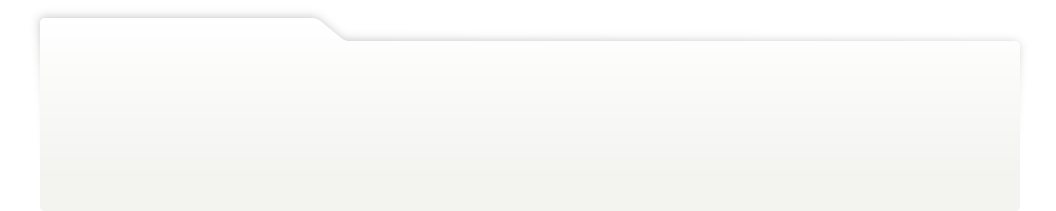
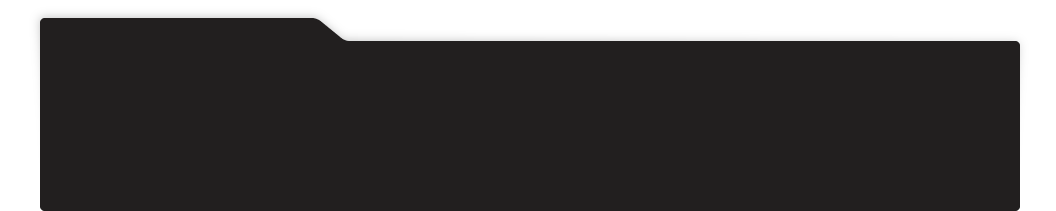
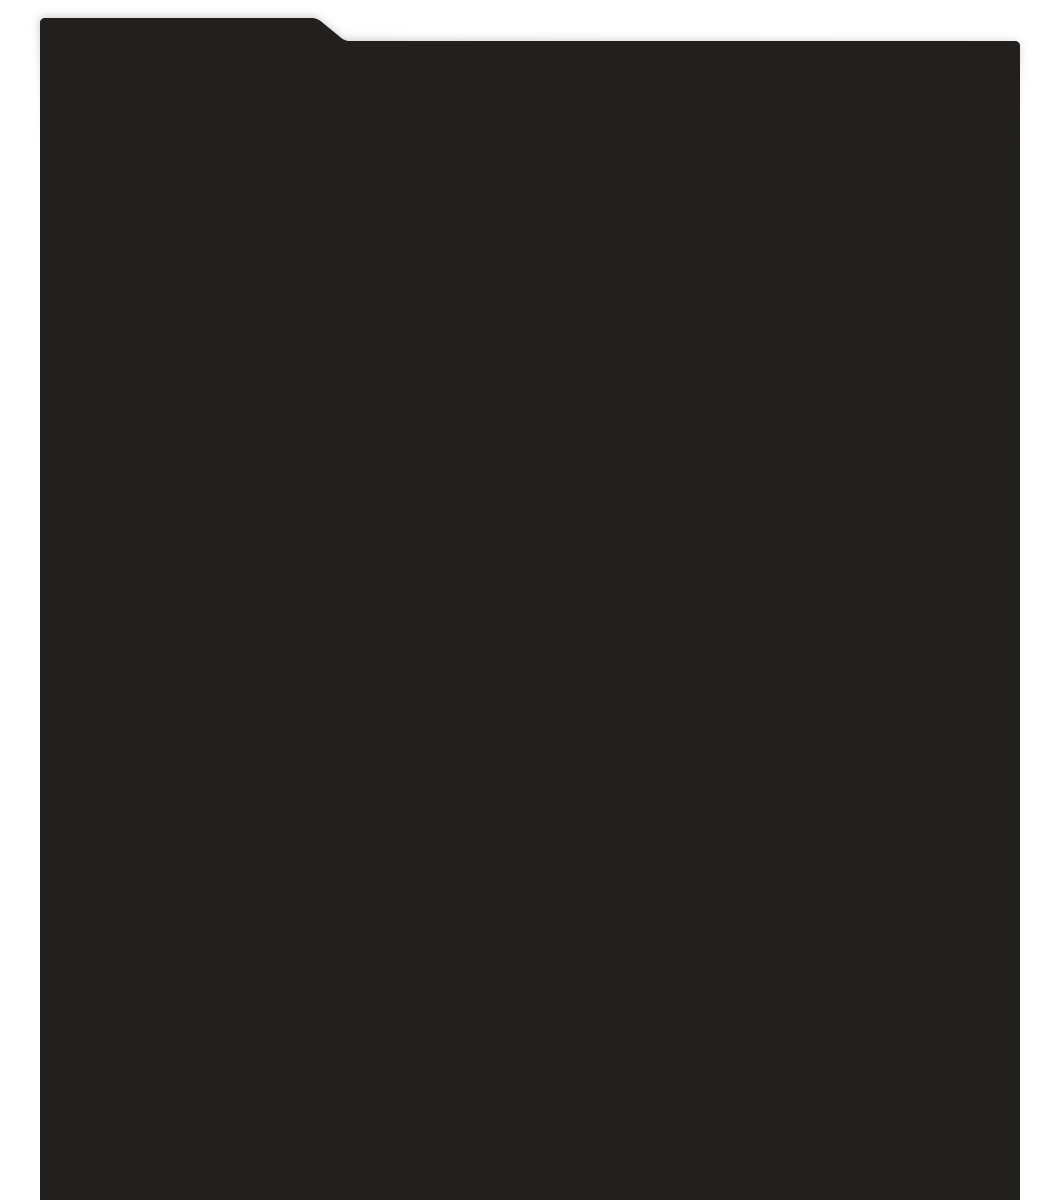
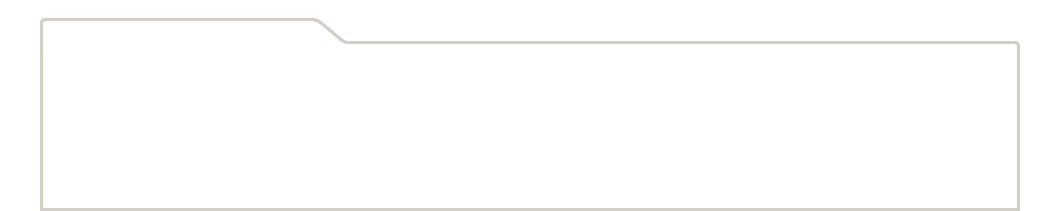
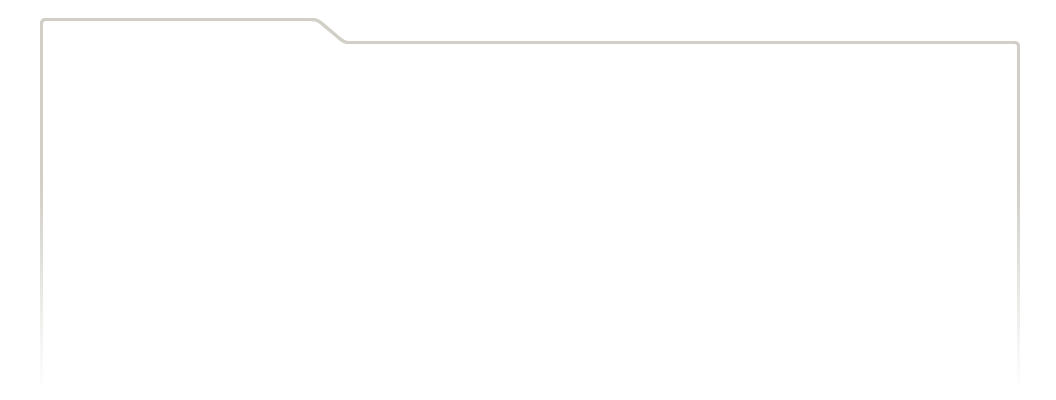
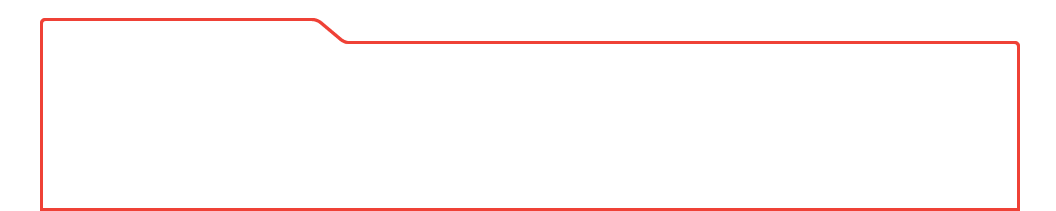
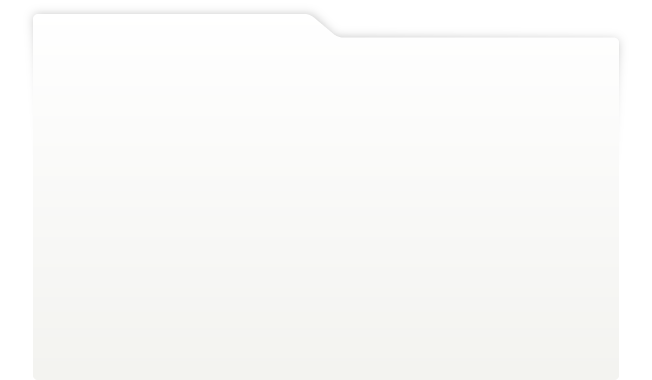
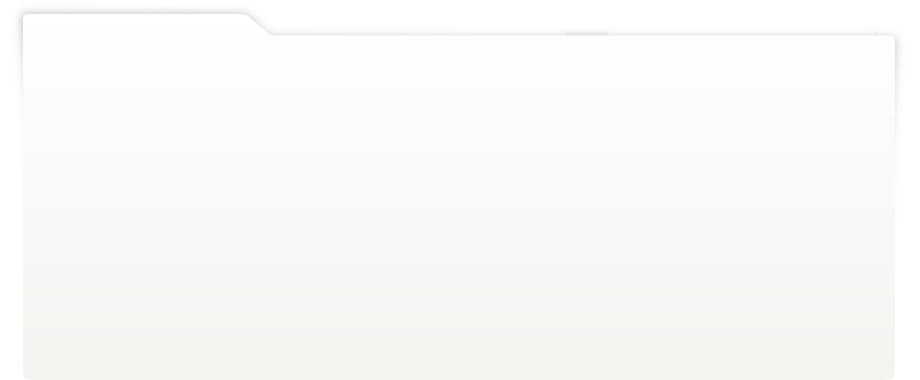
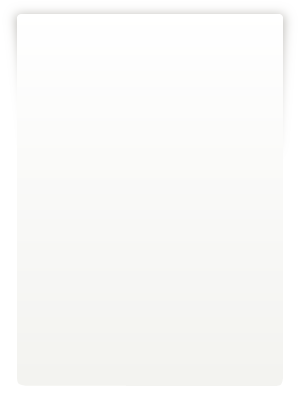
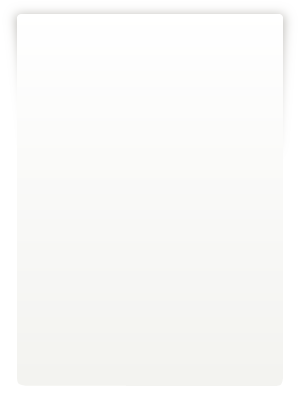
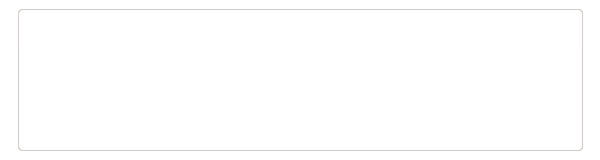
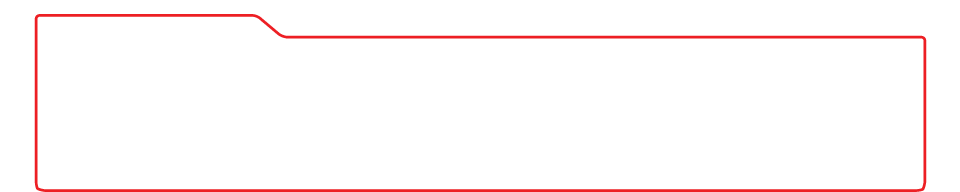
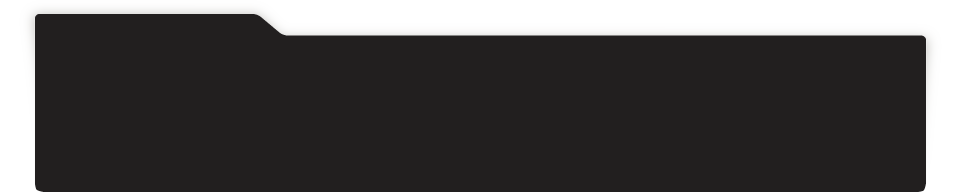
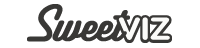
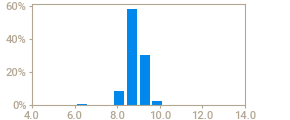
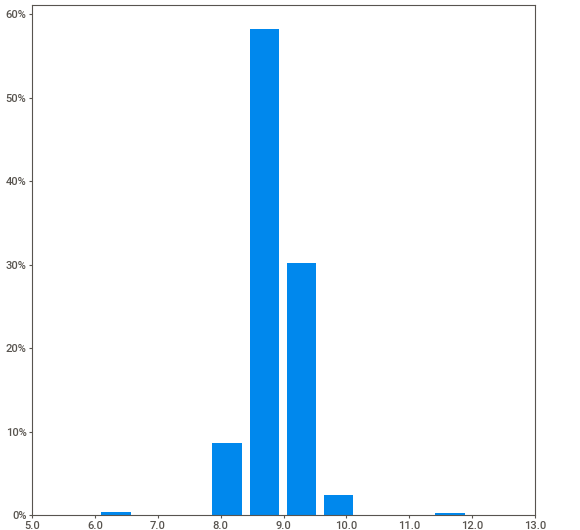
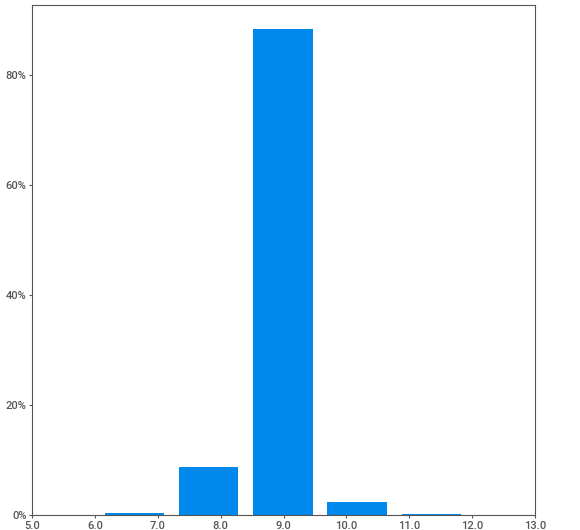
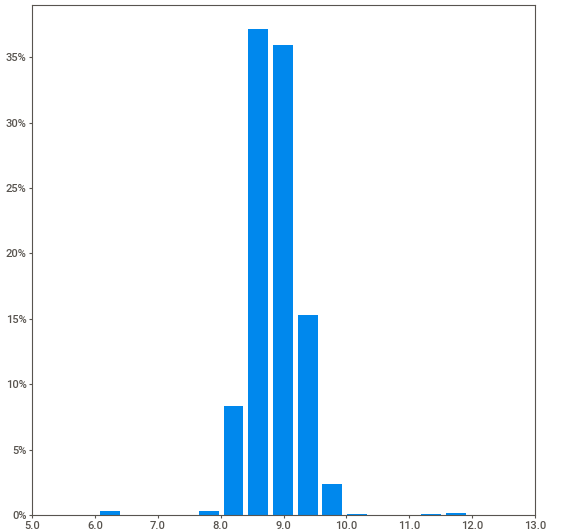
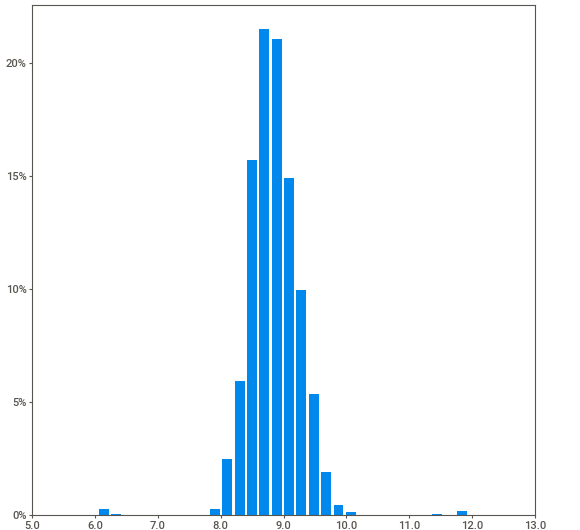
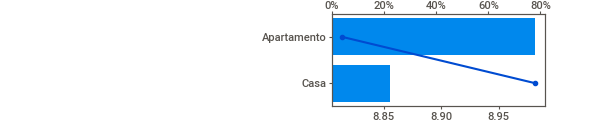
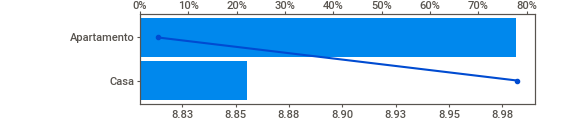
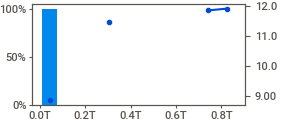
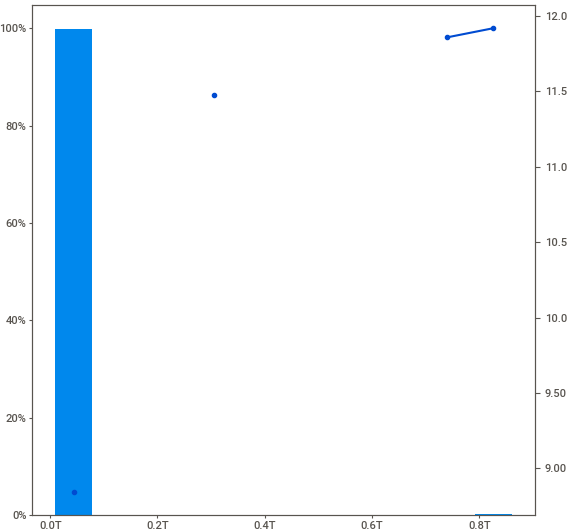
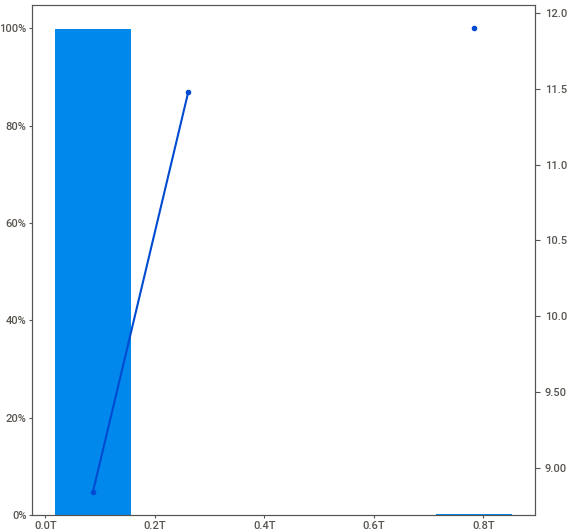
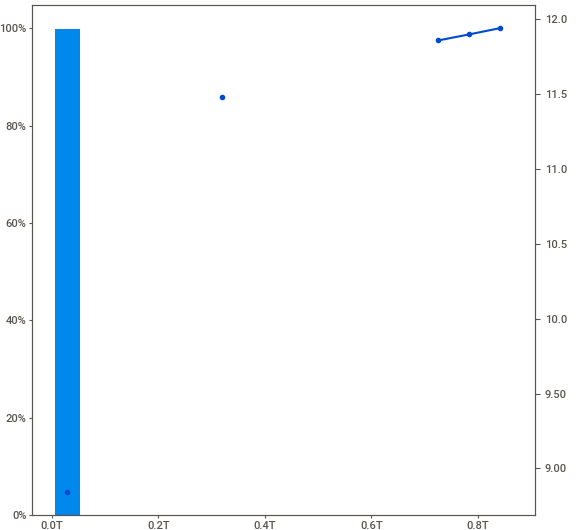
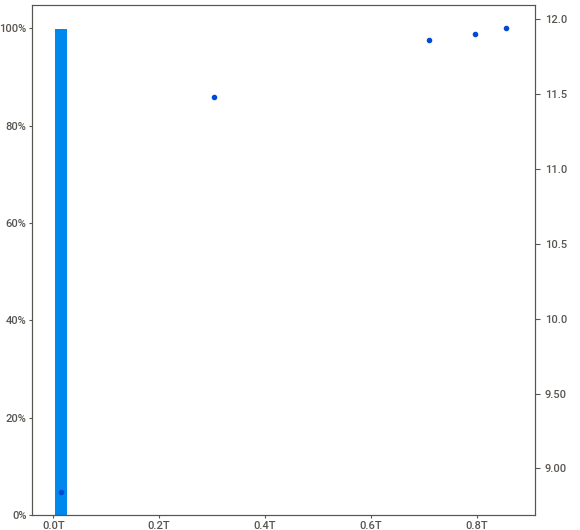
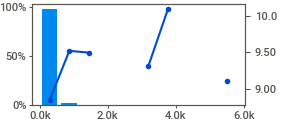
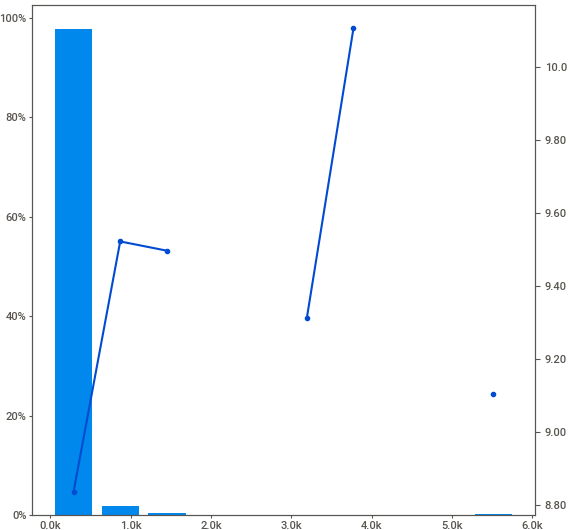
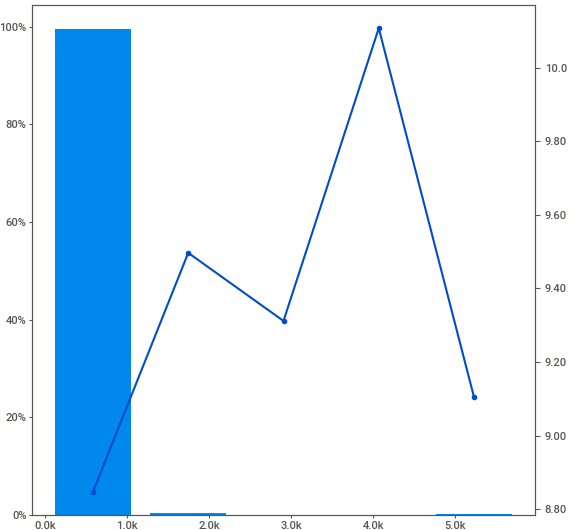
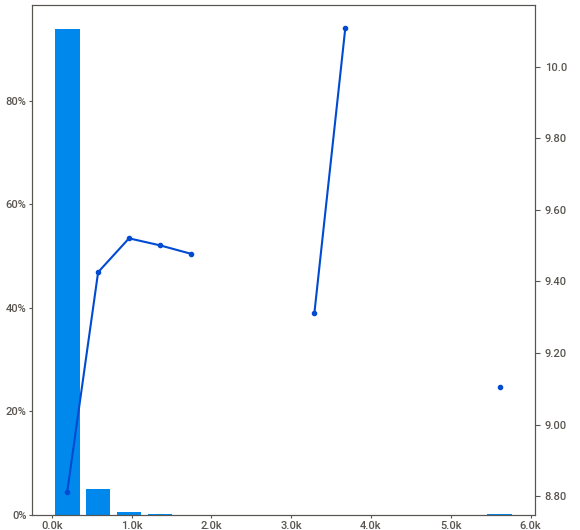
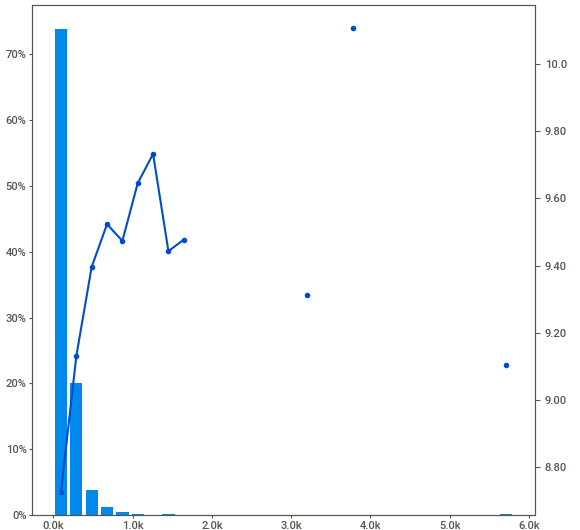
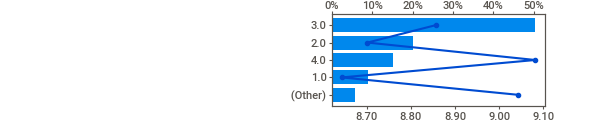
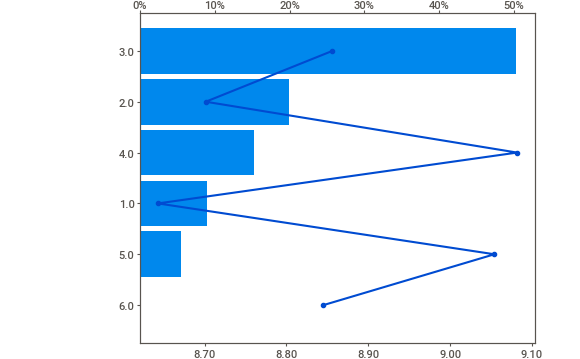
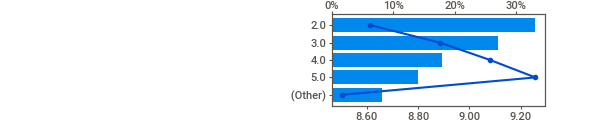
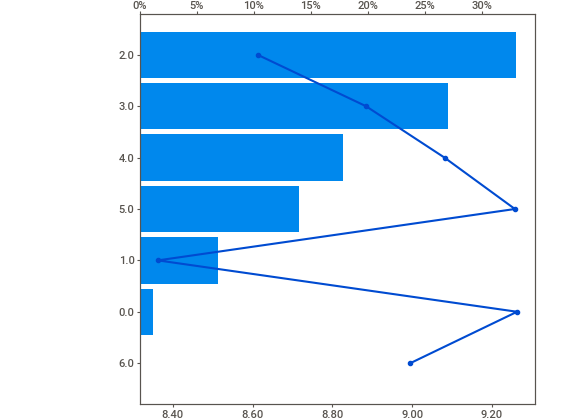
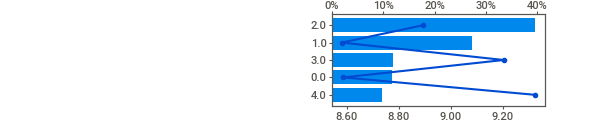
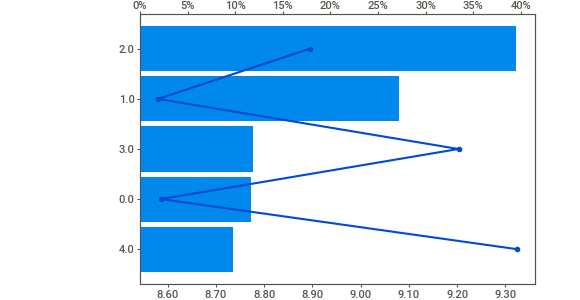
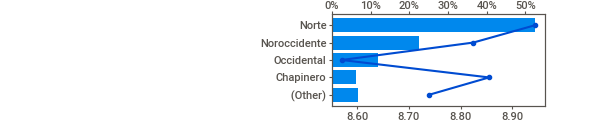
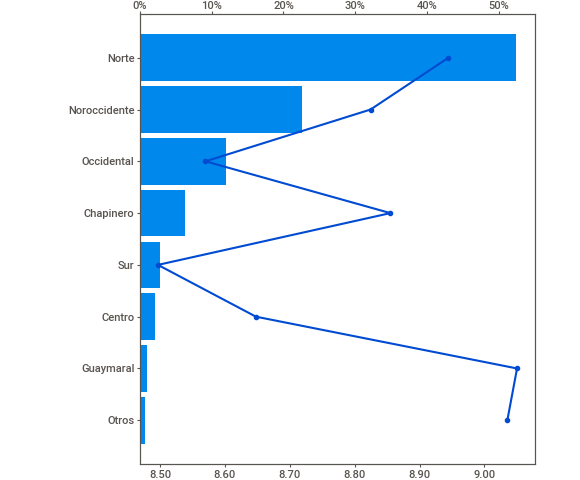
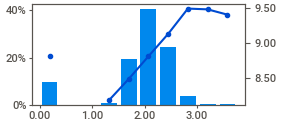
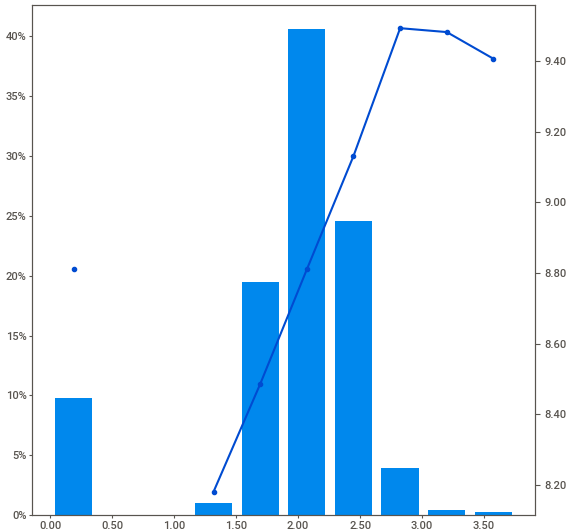
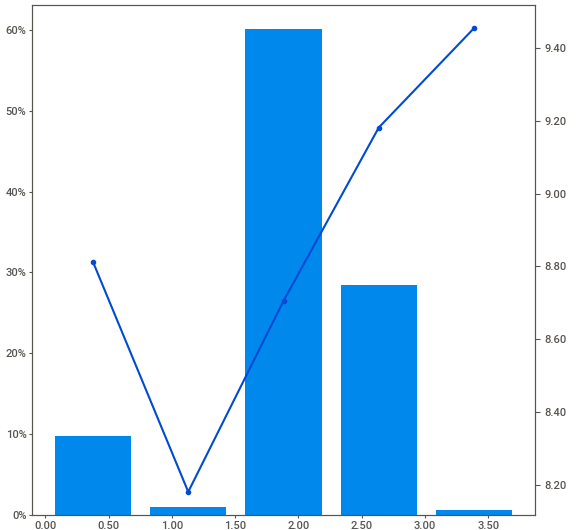
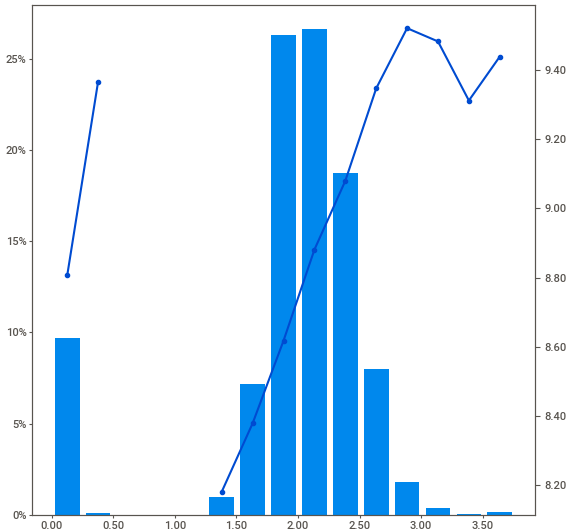
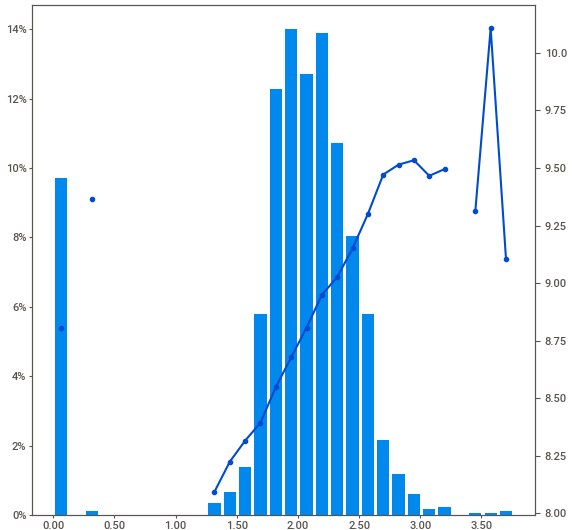
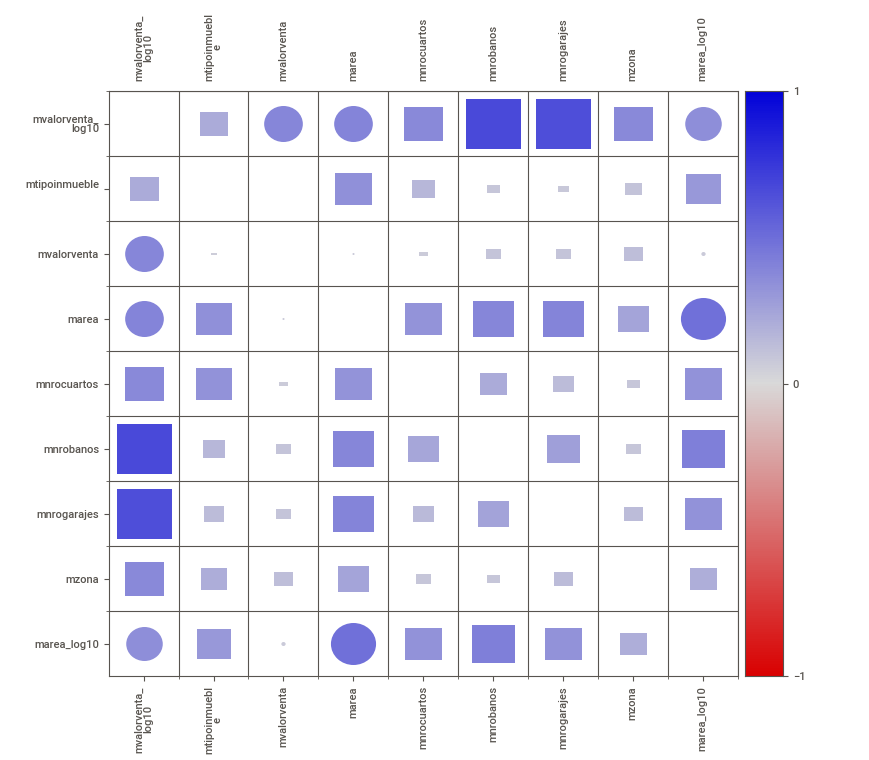
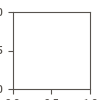

In [71]:
reporte = sv.analyze(datos3, target_feat='mvalorventa_log10')
reporte.show_html()
HTML('SWEETVIZ_REPORT.html')

Ahora vamos a confirmar la asociación entre `marea_log10` y `mvalorventa_log10`:

<Axes: xlabel='marea', ylabel='mvalorventa'>

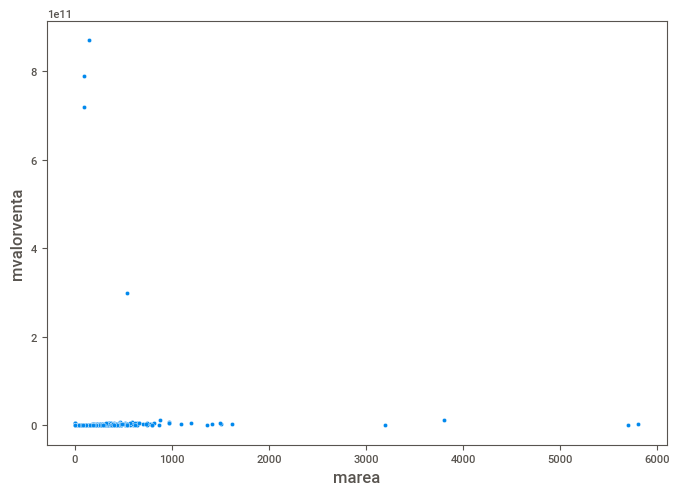

In [72]:
sns.scatterplot(x = 'marea', y = 'mvalorventa', data=datos3)

<Axes: xlabel='marea_log10', ylabel='mvalorventa_log10'>

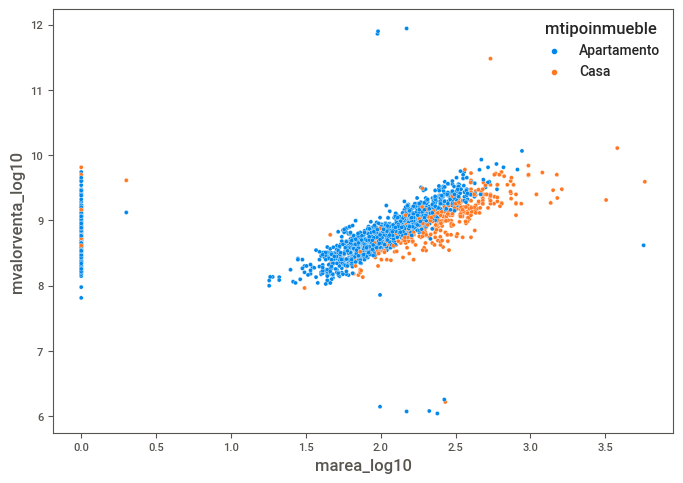

In [73]:
sns.scatterplot(x = 'marea_log10', y = 'mvalorventa_log10', hue='mtipoinmueble', data=datos3)

Se eliminarán los atípicos para realizar un modelo sobre las viviendas que tienen comportamiento más común.

**Advertencia**: Eliminar información no es la mejor opción. Siempre considere realizar imputación que tenga sentido o realizar modelos separados a los atípicos!

<Axes: xlabel='marea_log10', ylabel='mvalorventa_log10'>

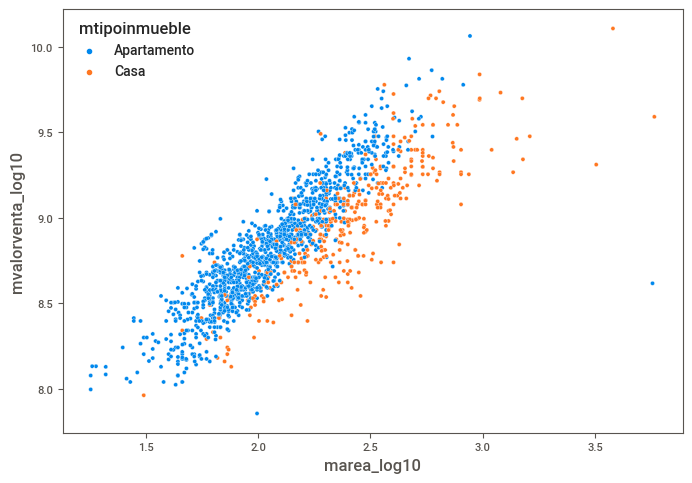

In [74]:
filtro = (datos3.marea_log10 > 1) & (datos3.mvalorventa_log10 < 11) & (datos3.mvalorventa_log10 > 7)
datos4 = datos3[filtro]
sns.scatterplot(x = 'marea_log10', y = 'mvalorventa_log10', hue='mtipoinmueble', data=datos4)

## 4. Modelo de pronóstico de precio

In [75]:
from sklearn.model_selection import train_test_split
# Paso 1: Preparación de datos
X = datos4[['marea_log10']]
y = datos4['mvalorventa_log10']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Dimensiones de X_train: {X_train.shape}')
print(f'Dimensiones de X_test:  {X_test.shape}')
print(f'Dimensiones de y_train: {y_train.shape}')
print(f'Dimensiones de X_test:  {y_test.shape}')

Dimensiones de X_train: (1285, 1)
Dimensiones de X_test:  (322, 1)
Dimensiones de y_train: (1285,)
Dimensiones de X_test:  (322,)


In [76]:
from sklearn.linear_model import LinearRegression

# Paso 2: Definir modelo
modelo_lr = LinearRegression()

# Paso 3: Ajustar modelo
modelo_lr.fit(X_train, y_train)

# Paso 4: Pronosticos
y_pred = modelo_lr.predict(X_test)

<Axes: xlabel='mvalorventa_log10', ylabel='Count'>

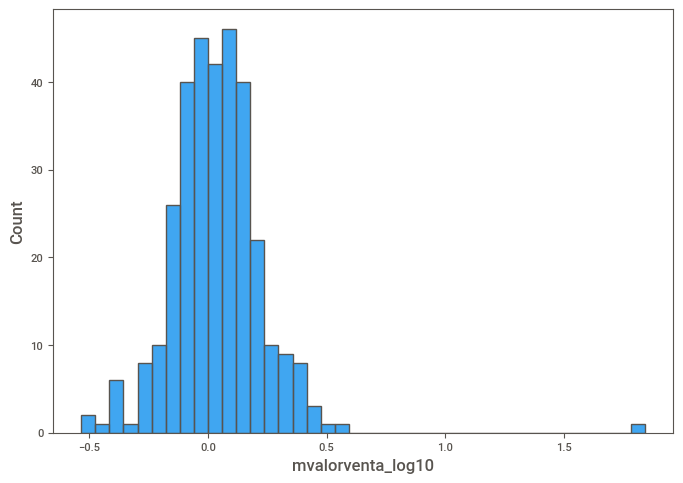

In [77]:
# Paso 5: Evaluar modelo

resid = y_pred - y_test
sns.histplot(resid)

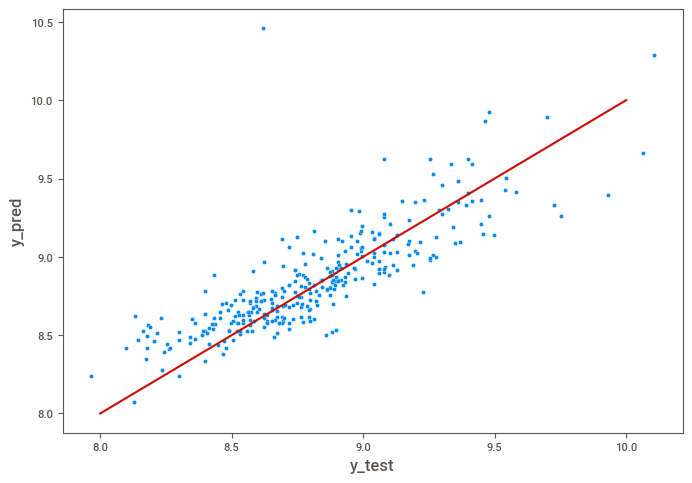

In [78]:
sns.scatterplot(x=y_test, y=y_pred)
plt.ylabel('y_pred')
plt.xlabel('y_test')
plt.plot([8,10], [8,10], 'r-')

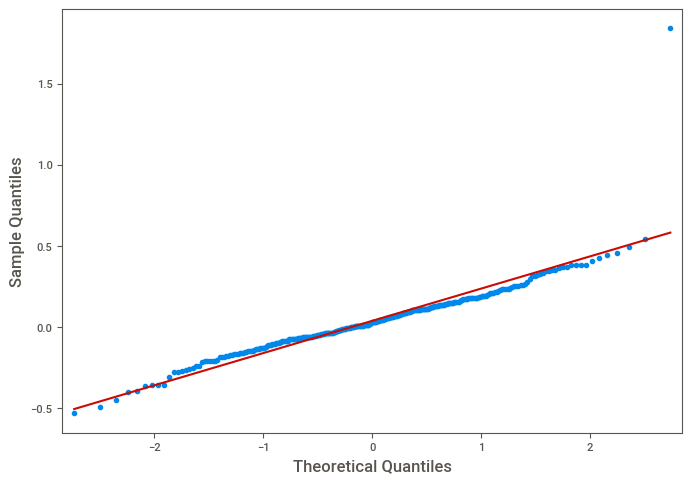

In [79]:
from statsmodels.graphics.gofplots import qqplot
qqplot(resid, line='s')
plt.show()

In [80]:
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

print(f'RMSE: {mean_squared_error(10**y_test, 10**y_pred, squared=False)}')
print(f'MAE:  {mean_absolute_error(10**y_test, 10**y_pred)}')
print(f'MAPE: {mean_absolute_percentage_error(10**y_test, 10**y_pred)*100}')

RMSE: 1822733988.7287242
MAE:  457734733.61560184
MAPE: 56.37092239267956


Hemos identificado una vivienda con un error muy alto, ¿cuál será?

In [81]:
resid.sort_values(ascending=False)

2245    1.839748
1239    0.544039
3721    0.491360
8710    0.453148
4485    0.445876
          ...   
155    -0.395288
2722   -0.401193
123    -0.451940
78     -0.493734
726    -0.534097
Name: mvalorventa_log10, Length: 322, dtype: float64

La vivienda que causa el problema es la **2245**

In [82]:
datos4.loc[2245]

mtipoinmueble            Apartamento
mvalorventa                415000000
marea                         5700.0
mnrocuartos                      2.0
mnrobanos                        2.0
mnrogarajes                      0.0
mzona                          Norte
mbarrio               MOCHUELO NORTE
mnombrecomunbarrio           Usaquen
mvalorventa_log10           8.618048
marea_log10                 3.755951
Name: 2245, dtype: object

Hemos encontrado el problema! El precio estimado tan alto se debe a un error de digitación del área. Como el área es muy alta, la estimación del precio también lo será. Vamos a intentar imputar este valor, revisando los precios de venta en `Mochuelo Norte`

In [83]:
filtro = (datos4.mbarrio == 'MOCHUELO NORTE')
datos4[filtro]

,mtipoinmueble,mvalorventa,marea,mnrocuartos,mnrobanos,mnrogarajes,mzona,mbarrio,mnombrecomunbarrio,mvalorventa_log10,marea_log10
2245,Apartamento,415000000,5700.0,2.0,2.0,0.0,Norte,MOCHUELO NORTE,Usaquen,8.618048,3.755951
2974,Apartamento,720000000,146.0,3.0,2.0,2.0,Norte,MOCHUELO NORTE,SANTA BARBARA,8.857332,2.167317
3228,Apartamento,1500000000,356.0,4.0,5.0,3.0,Norte,MOCHUELO NORTE,SANTA BARBARA,9.176091,2.552668
9974,Apartamento,595000000,114.0,3.0,3.0,1.0,Norte,MOCHUELO NORTE,Santa Bárbara,8.774517,2.060698


In [84]:
filtro = (datos4.mnombrecomunbarrio == 'Usaquen')
datos4[filtro]

,mtipoinmueble,mvalorventa,marea,mnrocuartos,mnrobanos,mnrogarajes,mzona,mbarrio,mnombrecomunbarrio,mvalorventa_log10,marea_log10
2245,Apartamento,415000000,5700.00,2.0,2.0,0.0,Norte,MOCHUELO NORTE,Usaquen,8.618048,3.755951
4984,Apartamento,660000000,100.88,3.0,3.0,2.0,Norte,SAN GABRIEL NORTE,Usaquen,8.819544,2.008089
4985,Apartamento,710000000,107.73,3.0,3.0,2.0,Norte,SAN GABRIEL NORTE,Usaquen,8.851258,2.036349
6987,Apartamento,3200000000,333.00,3.0,5.0,0.0,Norte,USAQUEN,Usaquen,9.505150,2.523746


Probablemente el error de digitación es causa del punto decimal que está mal puesto. Entonces vamos a corregir el área de esa vivienda pasando de $5700m^2$ a $57.00m^2$.

In [85]:
datos5 = datos4.copy()
datos5['marea'][2245] = 57
datos5['marea_log10'][2245] = np.log10(57)
datos5.loc[2245]

mtipoinmueble            Apartamento
mvalorventa                415000000
marea                           57.0
mnrocuartos                      2.0
mnrobanos                        2.0
mnrogarajes                      0.0
mzona                          Norte
mbarrio               MOCHUELO NORTE
mnombrecomunbarrio           Usaquen
mvalorventa_log10           8.618048
marea_log10                 1.755875
Name: 2245, dtype: object

Hemos realizado el ajuste, vamos a volver a generar el modelo y revisar sus métricas

Dimensiones de X_train: (1285, 1)
Dimensiones de X_test:  (322, 1)
Dimensiones de y_train: (1285,)
Dimensiones de X_test:  (322,)


<Axes: xlabel='mvalorventa_log10', ylabel='Count'>

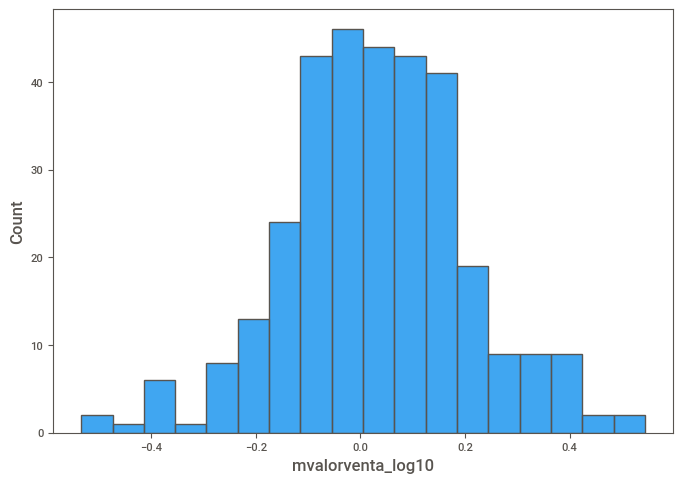

In [86]:
# Paso 1: Preparación de datos
X = datos5[['marea_log10']]
y = datos5['mvalorventa_log10']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Dimensiones de X_train: {X_train.shape}')
print(f'Dimensiones de X_test:  {X_test.shape}')
print(f'Dimensiones de y_train: {y_train.shape}')
print(f'Dimensiones de X_test:  {y_test.shape}')

# Paso 2: Definir modelo
modelo_lr = LinearRegression()

# Paso 3: Ajustar modelo
modelo_lr.fit(X_train, y_train)

# Paso 4: Pronosticos
y_pred = modelo_lr.predict(X_test)

# Paso 5: Evaluar modelo

resid = y_pred - y_test
sns.histplot(resid)

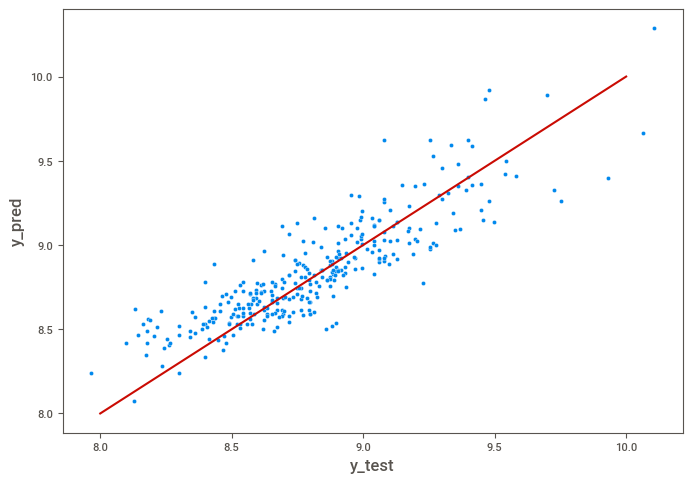

In [87]:
sns.scatterplot(x=y_test, y=y_pred)
plt.ylabel('y_pred')
plt.xlabel('y_test')
plt.plot([8,10], [8,10], 'r-')

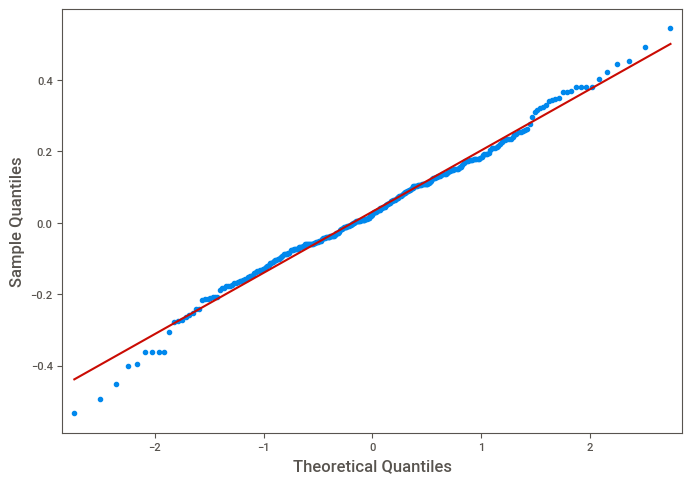

In [88]:
from statsmodels.graphics.gofplots import qqplot
qqplot(resid, line='s')
plt.show()

In [89]:
print(f'RMSE: {mean_squared_error(10**y_test, 10**y_pred, squared=False)}')
print(f'MAE:  {mean_absolute_error(10**y_test, 10**y_pred)}')
print(f'MAPE: {mean_absolute_percentage_error(10**y_test, 10**y_pred)*100}')

RMSE: 915854370.0202533
MAE:  370218990.2889775
MAPE: 35.282791470601396


En el caso de estudio, no se debería utilizar el RMSE o MAE como métrica para evaluar el error del modelo en pesos. En su lugar se debería utilizar el MAPE, la fórmula es la siguiete:

$$MAPE = \frac{1}{m} \sum_{j=1}^m \left| \frac{\hat y^{(j)} - y^{(j)}}{y^{(j)}}\right|$$

Por ejemplo, suponga que el error de una vivienda es 500M, el costo real de la vivienda es 500kM. Veamos cual sería en MAPE de esta vivienda:

$$MAPE = \frac{500M}{500000M}= 0.001 = 0.1\%$$

Volviendo al caso de estudio, mi modelo se está equivocando en un 35\% del valor real.

## 5. Modelo de clasificación de tipo de vivienda

Vamos a pronosticar el tipo de vivienda (apartamento o casa) a partir de la información disponible.

<Axes: xlabel='mvalorventa_log10', ylabel='marea_log10'>

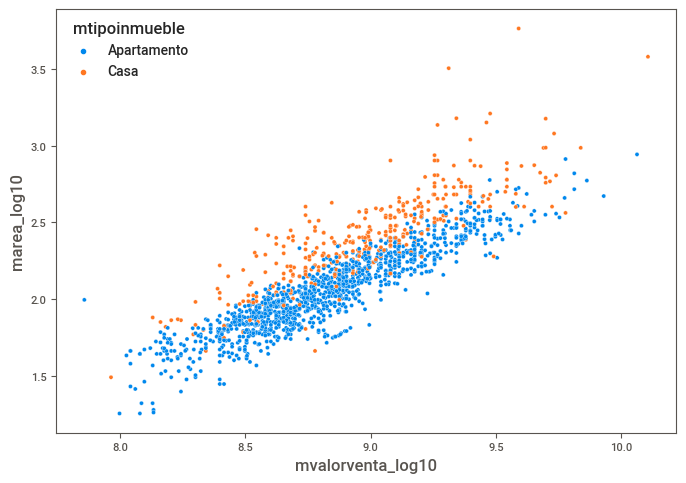

In [90]:
sns.scatterplot(data=datos5, x = 'mvalorventa_log10', y = 'marea_log10', hue = 'mtipoinmueble')

<Axes: xlabel='marea_log10', ylabel='mtipoinmueble'>

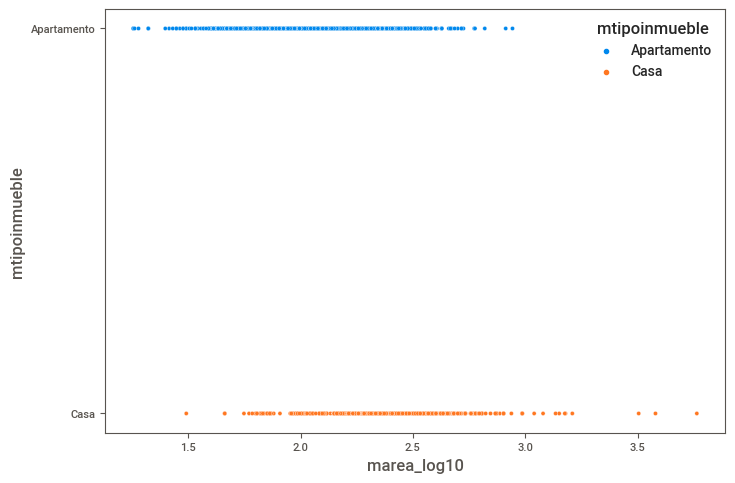

In [91]:
sns.scatterplot(data=datos5, x = 'marea_log10', y = 'mtipoinmueble', hue = 'mtipoinmueble')

El objetivo es separar los puntos azules de los verdes!
Para esto vamos a utilizar un modelo de regresión logístico.

In [92]:
from sklearn.linear_model import LogisticRegression

# Paso 1: Preparar los datos
X = datos5[['mvalorventa_log10', 'marea_log10']]
y = datos5[['mtipoinmueble']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 2: Crear modelo
modelo_lr = LogisticRegression()

# Paso 3: Ajustar modelo
modelo_lr.fit(X_train, y_train)

# Paso 4: Pronosticos
y_pred = modelo_lr.predict(X_test)

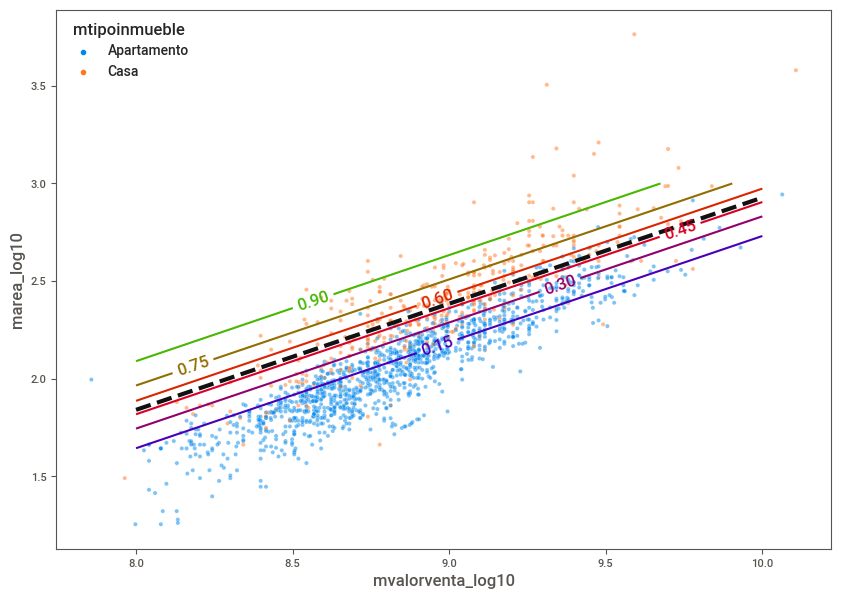

In [93]:
# Paso 5: Evaluar modelo

# Gráficamente

# Paso 3: Evaluación del modelo
plt.figure(figsize=(10, 7))
sns.scatterplot(data=datos5, x='mvalorventa_log10', y='marea_log10', hue = 'mtipoinmueble', alpha=0.5)

# Creamos una grilla de valores que barran todos los valores posibles para area y precio
x0, x1 = np.meshgrid(
        np.linspace(8, 10, 100).reshape(-1, 1),
        np.linspace(1.5, 3, 100).reshape(-1, 1)
    )

# Construimos los valores de entrada X_new y su correspondiente salida
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = modelo_lr.predict_proba(X_new)

zz = y_proba[:, 1].reshape(x0.shape)

# Graficamos algunos valores de contorno (curvas de nivel) de la función sigmoide
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

# Se seleccionan dos puntos para graficar la línea límite de decisión
left_right = np.array([8, 10])
boundary = -(modelo_lr.coef_[0][0] * left_right + modelo_lr.intercept_[0]) / modelo_lr.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
#plt.text(3, 8.5, "Casa ($\hat y = 1$)", fontsize=15, color="orange", ha="center")
#plt.text(1.8, 9.6, "Apartamento ($\hat y = 0$)", fontsize=15, color="b", ha="center")
plt.show()


**Así se verían los puntos y la sigmoide en 3D**

![](http://talimi.se/wp-content/uploads/2017/11/logistic-regression-in-3d-with-2-independent-variables.png)

In [94]:
from sklearn.metrics import  classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 Apartamento       0.86      0.98      0.92       243
        Casa       0.88      0.53      0.66        79

    accuracy                           0.87       322
   macro avg       0.87      0.75      0.79       322
weighted avg       0.87      0.87      0.85       322



Como podemos observar los tipos de vivienda están desbalanceados (por cada casa hay tres apartamentos aprox). Esto se conoce como el problema del **desbalance de clases**. Una manera de evitar este problema es utilizando una **función de costo sensible**. En pocas palabras este método penaliza en mayor proporción aquellas casas mal clasificadas.

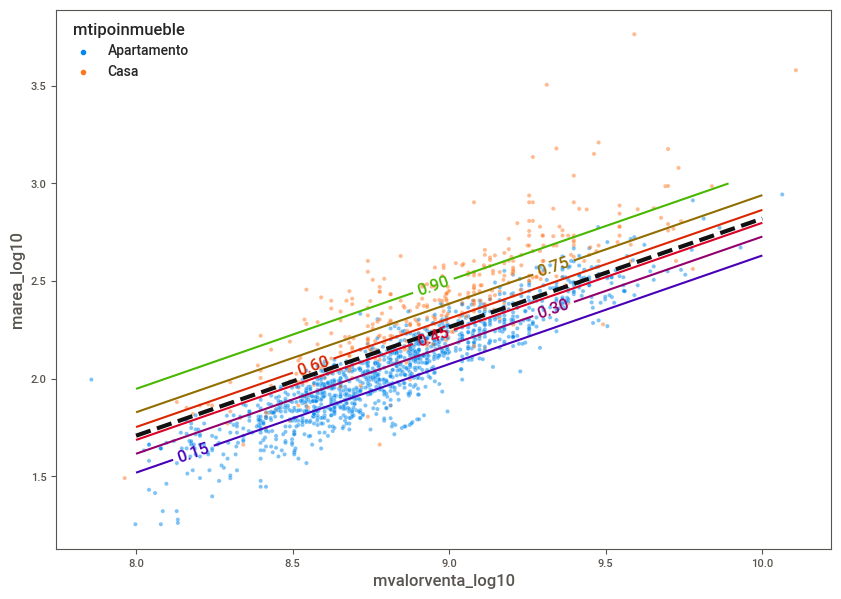

In [95]:
from sklearn.linear_model import LogisticRegression

# Paso 1: Preparar los datos
X = datos5[['mvalorventa_log10', 'marea_log10']]
y = datos5[['mtipoinmueble']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 2: Crear modelo
modelo_lr2 = LogisticRegression(class_weight = 'balanced')

# Paso 3: Ajustar modelo
modelo_lr2.fit(X_train, y_train)

# Paso 4: Pronosticos
y_pred = modelo_lr2.predict(X_test)

# Paso 5: Evaluar modelo

# Gráficamente

# Paso 3: Evaluación del modelo
plt.figure(figsize=(10, 7))
sns.scatterplot(data=datos5, x='mvalorventa_log10', y='marea_log10', hue = 'mtipoinmueble', alpha=0.5)

# Creamos una grilla de valores que barran todos los valores posibles para area y precio
x0, x1 = np.meshgrid(
        np.linspace(8, 10, 100).reshape(-1, 1),
        np.linspace(1.5, 3, 100).reshape(-1, 1)
    )

# Construimos los valores de entrada X_new y su correspondiente salida
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = modelo_lr2.predict_proba(X_new)

zz = y_proba[:, 1].reshape(x0.shape)

# Graficamos algunos valores de contorno (curvas de nivel) de la función sigmoide
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

# Se seleccionan dos puntos para graficar la línea límite de decisión
left_right = np.array([8, 10])
boundary = -(modelo_lr2.coef_[0][0] * left_right + modelo_lr2.intercept_[0]) / modelo_lr2.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
#plt.text(3, 8.5, "Casa ($\hat y = 1$)", fontsize=15, color="orange", ha="center")
#plt.text(1.8, 9.6, "Apartamento ($\hat y = 0$)", fontsize=15, color="b", ha="center")
plt.show()

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 Apartamento       0.94      0.90      0.92       243
        Casa       0.73      0.82      0.77        79

    accuracy                           0.88       322
   macro avg       0.84      0.86      0.85       322
weighted avg       0.89      0.88      0.88       322



## 6. Lecciones aprendidas

In [97]:
best_model_cls = classification.compare_models()

NameError: name 'classification' is not defined

In [ ]:
classification.evaluate_model(best_model_cls)

In [ ]:
fine_best_model_cls = classification.tune_model(best_model_cls)

In [ ]:
classification.evaluate_model(fine_best_model_cls)

In [ ]:
pip install shap

In [ ]:
rf_model_cls = classification.create_model('rf')

In [ ]:
classification.interpret_model(rf_model_cls)

Interpretación de la gráfica:
1. Cada punto es una vivienda
2. Las filas corresponden a las variables, de la más a la menos importante para clasificar el tipo de vivienda. Ej: El num de cuartos es lo más importante para clasificar.
3. Azul significa que la variable toma valores bajos, mientras el color rojo significa que toma valores altos. Ej: En la primer fila un punto azul es una vivienda con pocos cuartos, mientras un punto rojo es una vivienda con muchos cuartos.
4. El eje horizontal: A la izquierda significa que tenemos alta probabilidad de apartamentos, a la derecha alta probabilidad de casas. Nota: Realmente no es una probabilidad, realmente se dice alto o bajo shap value.

In [ ]:
classification.predict_model(best_model_cls)

In [ ]:
classification.save_model(best_model_cls, 'modelo_clasificacion_viviendas')

In [ ]:
classification.load_model('modelo_clasificacion_viviendas')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6b01f3fd-002a-43ad-8b2f-83f22b9a4ee6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>